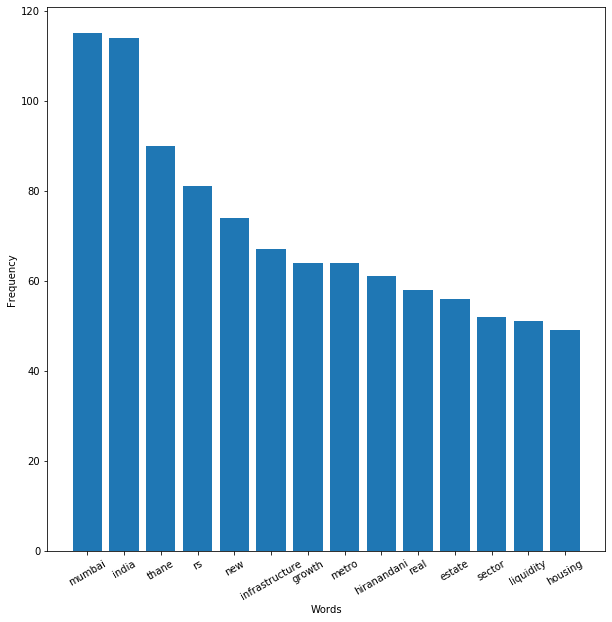

In [1]:
import os
from nltk.tag import StanfordNERTagger
import pandas as pd
from nltk.tag import StanfordNERTagger
from nltk.tokenize import word_tokenize
import GetOldTweets3 as got
import active
from textblob import TextBlob

tweetCriteria = got.manager.TweetCriteria().setUsername("@N_Hiranandani")\
                                           .setMaxTweets(1000)
tweet = got.manager.TweetManager.getTweets(tweetCriteria)
nounlist=list()
clean=list()
for i in tweet:
    try:
        text1 = active.deEmojify(i.text) 
#         print(text1)
        text=active.clean_tweet(text1)
        clean.append(text)
        blob = TextBlob(text)
        for nouns in blob.noun_phrases:
            nounlist.append(nouns)
    except:
        continue
li1=pd.Series(nounlist)

active.wordcloud(li1)



In [3]:
import os
st = StanfordNERTagger('C:/Users/Parth/Contacts/Downloads/New Stanford/stanford-english-corenlp-2018-10-05-models/edu/stanford/nlp/models/ner/english.all.3class.caseless.distsim.crf.ser.gz','C:/Users/Parth/Contacts/Downloads/stanford-ner-2015-04-20/stanford-ner.jar',encoding='utf-8')
java_path = "C:/Program Files/Java/jdk1.8.0_131/bin/java.exe"
os.environ['JAVAHOME'] = java_path


tokenized_text = word_tokenize(text)
classified_text = st.tag(tokenized_text)

is_noun = lambda pos: pos[:3] == 'ORG'
nouns = [word for (word, pos) in classified_text if is_noun(pos)] 
print(nouns)
noun=pd.Series(nouns)
active.wordcloud(noun)

CRFClassifier invoked on Fri Dec 27 15:53:22 IST 2019 with arguments:
   -loadClassifier C:/Users/Parth/Contacts/Downloads/New Stanford/stanford-english-corenlp-2018-10-05-models/edu/stanford/nlp/models/ner/english.all.3class.caseless.distsim.crf.ser.gz -textFile C:\Users\Parth\AppData\Local\Temp\tmpf0lu_urk -outputFormat slashTags -tokenizerFactory edu.stanford.nlp.process.WhitespaceTokenizer -tokenizerOptions "tokenizeNLs=false" -encoding utf-8
tokenizerFactory=edu.stanford.nlp.process.WhitespaceTokenizer
tokenizerOptions="tokenizeNLs=false"
loadClassifier=C:/Users/Parth/Contacts/Downloads/New Stanford/stanford-english-corenlp-2018-10-05-models/edu/stanford/nlp/models/ner/english.all.3class.caseless.distsim.crf.ser.gz
encoding=utf-8
textFile=C:\Users\Parth\AppData\Local\Temp\tmpf0lu_urk
outputFormat=slashTags
Loading classifier from C:\Users\Parth\Contacts\Downloads\New Stanford\stanford-english-corenlp-2018-10-05-models\edu\stanford\nlp\models\ner\english.all.3class.caseless.distsim

OSError: Java command failed : ['C:/Program Files/Java/jdk1.8.0_131/bin/java.exe', '-mx1000m', '-cp', 'C:/Users/Parth/Contacts/Downloads/stanford-ner-2015-04-20/stanford-ner.jar', 'edu.stanford.nlp.ie.crf.CRFClassifier', '-loadClassifier', 'C:/Users/Parth/Contacts/Downloads/New Stanford/stanford-english-corenlp-2018-10-05-models/edu/stanford/nlp/models/ner/english.all.3class.caseless.distsim.crf.ser.gz', '-textFile', 'C:\\Users\\Parth\\AppData\\Local\\Temp\\tmpf0lu_urk', '-outputFormat', 'slashTags', '-tokenizerFactory', 'edu.stanford.nlp.process.WhitespaceTokenizer', '-tokenizerOptions', '"tokenizeNLs=false"', '-encoding', 'utf-8']

In [4]:
from nltk import word_tokenize
import nltk
text = word_tokenize("And now for something completely different")
#nltk.pos_tag(text)

is_noun = lambda pos: pos[:2] == 'NN'
nouns = [word for (word, pos) in nltk.pos_tag(text) if is_noun(pos)] 
print(nouns)